In [60]:
from PIL import Image, ImageDraw
import numpy as np

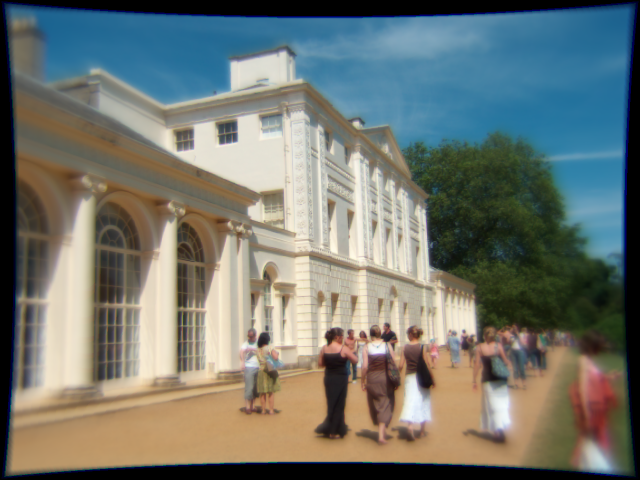

In [61]:
img = Image.open("ImageSim1.bmp")
display(img)

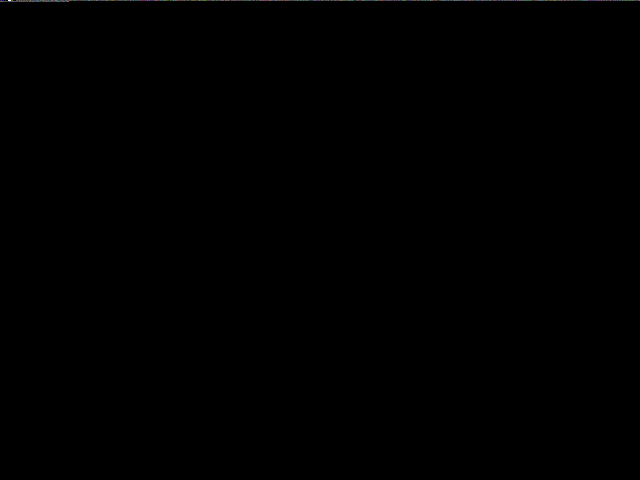

In [62]:
img.load()
raw_data = np.asarray(img)
new_data = np.empty_like(raw_data)
outimg = Image.fromarray(new_data)
display(outimg)

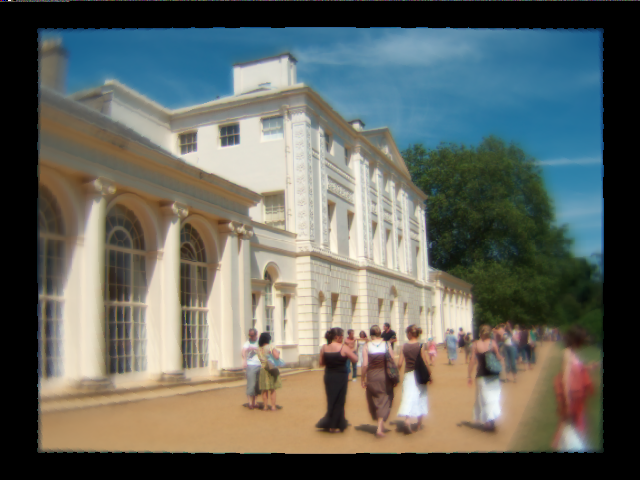

In [63]:
d = ImageDraw.Draw(outimg)
for i in range(0,640,1):
    for j in range(0,480,1):
        car_x = i - 320
        car_y = j - 240
        
        pol_r = np.sqrt(car_x**2 + car_y**2)
        pol_theta = np.arctan2(car_y, car_x)
        
        h = pol_r/358.33
        
        e_y = 41.67*h**3
        
        try:
            r, g, b = img.getpixel(((car_x+320)+e_y*np.cos(pol_theta),(car_y+240)+e_y*np.sin(pol_theta)))
        except:
            r = 0
            g = 0
            b = 0
        
        if r != 0 and g != 0 and b != 0:
            d.point((i,j),(r,g,b,255))
                               
display(outimg)